# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [25]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [26]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [27]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [28]:
# Class names in the CIFAR-10 dataset

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

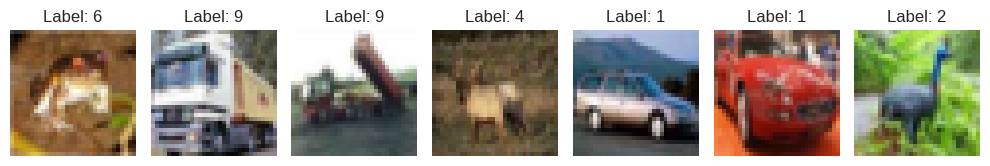

In [29]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
# Your code to display a few images before the model development.
#
plt.figure(figsize=(10, 5))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [31]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               1573376   
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [32]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8482 - accuracy: 0.3343
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6572 - accuracy: 0.4043
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5799 - accuracy: 0.4347
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5301 - accuracy: 0.4515
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4943 - accuracy: 0.4681
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4664 - accuracy: 0.4752
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4397 - accuracy: 0.4832
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4217 - accuracy: 0.4925
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4031 - accuracy: 0.4982
Epoch 10/10
1563/1563 [==============================] - 40s 25m

<ipython-input-34-1ec4f8fba4bc>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


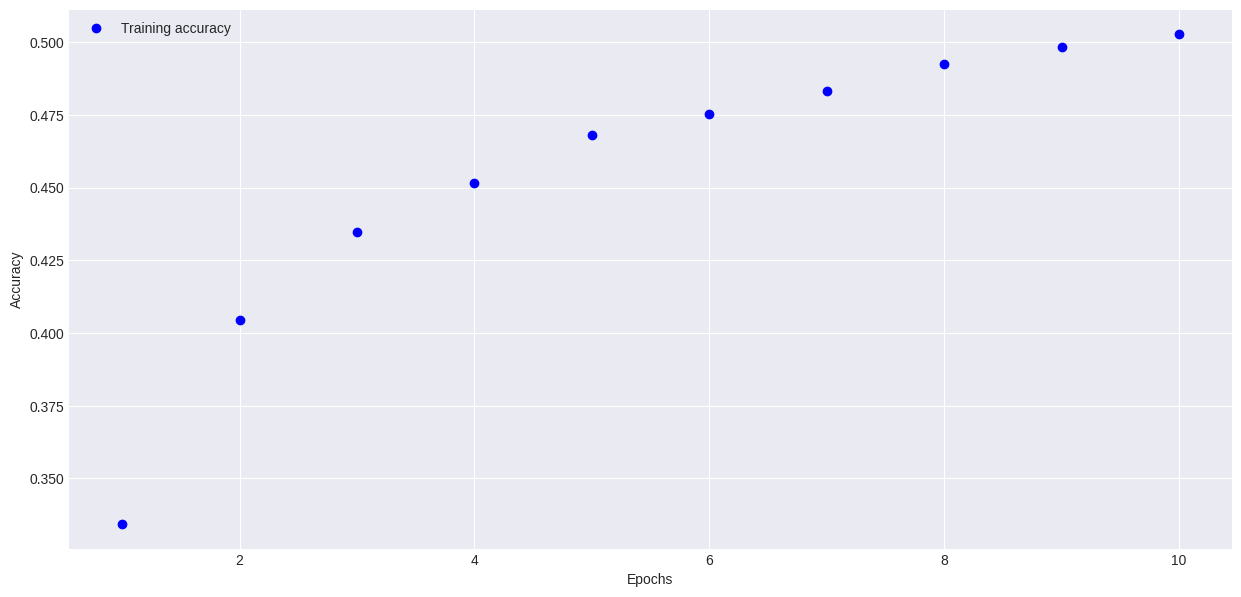

In [34]:
 # Print the training process graph and result

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 49.43%


### CNN model

In [36]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [37]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=15, verbose = 1)

Epoch 1/15
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5472 - accuracy: 0.4337
Epoch 2/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1821 - accuracy: 0.5788
Epoch 3/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0344 - accuracy: 0.6372
Epoch 4/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9374 - accuracy: 0.6698
Epoch 5/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8668 - accuracy: 0.6959
Epoch 6/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8123 - accuracy: 0.7158
Epoch 7/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7627 - accuracy: 0.7340
Epoch 8/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7238 - accuracy: 0.7454
Epoch 9/15
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6855 - accuracy: 0.7582
Epoch 10/15
1563/1563 [==============================] - 68s 44m

<ipython-input-39-78d16e5e88ae>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


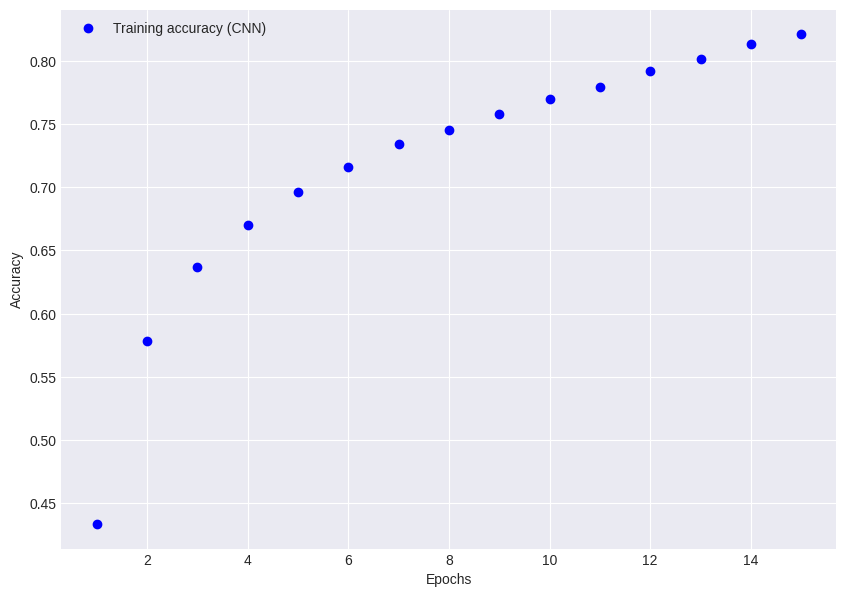

In [39]:
# Your code to print the CNN training process graph and result

# Print the CNN training process graph and result

history_dict_cnn = history2.history
plt.style.use('seaborn-darkgrid')

acc_values_cnn = history_dict_cnn['accuracy']
epochs_cnn = range(1, len(acc_values_cnn) + 1)

plt.figure(num=2, figsize=(10, 7))
plt.plot(epochs_cnn, acc_values_cnn, 'bo', label='Training accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

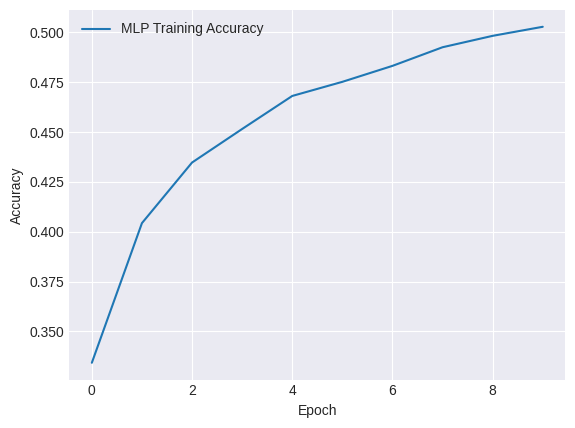

In [40]:
# Plot training accuracy and validation accuracy for MLP
plt.plot(history.history['accuracy'], label='MLP Training Accuracy')

# Check if 'val_accuracy' exists in the history dictionary before plotting
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='MLP Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 72.29%


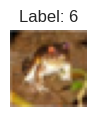

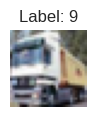

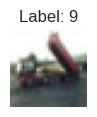

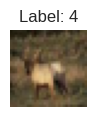

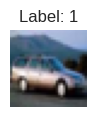

In [42]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [43]:
# Your code to do the above activity.
# Hint - import time

import time

In [44]:
# Your code to do the above activity.
# Hint - Put name of optimizers

optimizers = ['adam', 'sgd', 'adamax']

In [45]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists

training_times = []
accuracies = []

In [46]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.

for optimizer in optimizers:
    # Create a new CNN model with architectures different from the one provided
    print('\n', optimizer, 'Optimizer')

    # Create a new CNN model with altered architectures
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)



 adam Optimizer
Epoch 1/5
391/391 [==============================] - 270s 689ms/step - loss: 1.5307 - accuracy: 0.4383
Epoch 2/5
391/391 [==============================] - 257s 656ms/step - loss: 1.1128 - accuracy: 0.6048
Epoch 3/5
391/391 [==============================] - 254s 651ms/step - loss: 0.9084 - accuracy: 0.6805
Epoch 4/5
391/391 [==============================] - 253s 647ms/step - loss: 0.7678 - accuracy: 0.7316
Epoch 5/5
391/391 [==============================] - 256s 655ms/step - loss: 0.6464 - accuracy: 0.7754

 sgd Optimizer
Epoch 1/5
391/391 [==============================] - 248s 632ms/step - loss: 2.2580 - accuracy: 0.1539
Epoch 2/5
391/391 [==============================] - 244s 625ms/step - loss: 2.0287 - accuracy: 0.2710
Epoch 3/5
391/391 [==============================] - 247s 631ms/step - loss: 1.8855 - accuracy: 0.3255
Epoch 4/5
391/391 [==============================] - 246s 629ms/step - loss: 1.7701 - accuracy: 0.3702
Epoch 5/5
391/391 [=====================

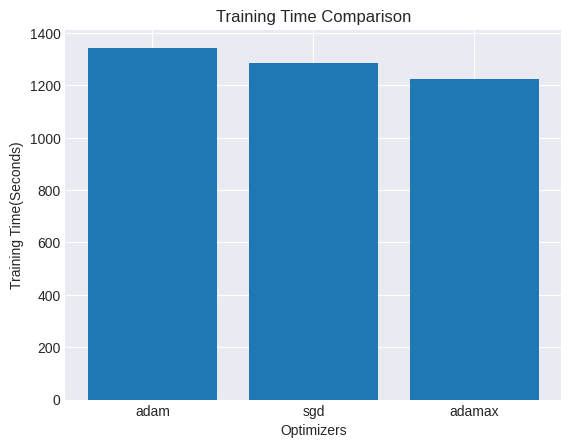

In [48]:
# Your code to do the above activity.
# Generate a bar plot to compare training times


plt.bar(optimizers,training_times)
plt.xlabel('Optimizers')
plt.ylabel('Training Time(Seconds)')
plt.title('Training Time Comparison')
plt.show()

Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [49]:
# Print accuracies achieved with different optimizers

for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

adam Optimizer - Test Accuracy: 72.65%
sgd Optimizer - Test Accuracy: 41.71%
adamax Optimizer - Test Accuracy: 70.29%


In [50]:
# Your code to
# Find and print the highest achieved accuracy

accuracy= max(accuracies)
print(f"Highest achieved accuracy:{accuracy *100:.2f}%")

Highest achieved accuracy:72.65%
